In [234]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # advanced plotting library
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV

The problem that as doctors, and the new laws, we are no longer allowed to ask about heroin usage within our patients. We have previous that that shows the drug's usage, and want to be able to classify 

In [235]:
data_with_headers = pd.read_csv('drug_consumption_with_headers.data')
data_with_headers = data_with_headers.rename(columns=lambda x: x.strip()) # Remove extra spaces from headers
data_with_headers
pd.set_option('max_columns', None)

In [236]:
data_with_headers.head()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [237]:
data_with_headers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      1885 non-null   int64  
 1   Age (Real)                              1885 non-null   float64
 2   Gender (Real)                           1885 non-null   float64
 3   Education (Real)                        1885 non-null   float64
 4   Country (Real)                          1885 non-null   float64
 5   Ethnicity (Real)                        1885 non-null   float64
 6   Nscore (Real) [neuroticism]             1885 non-null   float64
 7   Escore (Real) [Extraversion]            1885 non-null   float64
 8   Oscore (Real) [Openness to experience]  1885 non-null   float64
 9   Ascore (Real) [Agreeableness]           1885 non-null   float64
 10  Cscore (Real) [Conscientiousness]       1885 non-null   floa

In [238]:
data_with_headers.describe()

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [239]:
data_with_headers.all()

ID                                        True
Age (Real)                                True
Gender (Real)                             True
Education (Real)                          True
Country (Real)                            True
Ethnicity (Real)                          True
Nscore (Real) [neuroticism]               True
Escore (Real) [Extraversion]              True
Oscore (Real) [Openness to experience]    True
Ascore (Real) [Agreeableness]             True
Cscore (Real) [Conscientiousness]         True
Impulsive (Real)                          True
SS (Real) [sensation seeing (sic)]        True
Alcohol                                   True
Amphet                                    True
Amyl                                      True
Benzos                                    True
Caff                                      True
Cannabis                                  True
Choc                                      True
Coke                                      True
Crack        

In [240]:
labels = data_with_headers.columns
labels

Index(['ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)',
       'Country (Real)', 'Ethnicity (Real)', 'Nscore (Real) [neuroticism]',
       'Escore (Real) [Extraversion]',
       'Oscore (Real) [Openness to experience]',
       'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]',
       'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age (Real)'}>,
        <AxesSubplot:title={'center':'Gender (Real)'}>,
        <AxesSubplot:title={'center':'Education (Real)'}>],
       [<AxesSubplot:title={'center':'Country (Real)'}>,
        <AxesSubplot:title={'center':'Ethnicity (Real)'}>,
        <AxesSubplot:title={'center':'Nscore (Real) [neuroticism]'}>,
        <AxesSubplot:title={'center':'Escore (Real) [Extraversion]'}>],
       [<AxesSubplot:title={'center':'Oscore (Real) [Openness to experience]'}>,
        <AxesSubplot:title={'center':'Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':'Cscore (Real) [Conscientiousness]'}>,
        <AxesSubplot:title={'center':'Impulsive (Real)'}>],
       [<AxesSubplot:title={'center':'SS (Real) [sensation seeing (sic)]'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

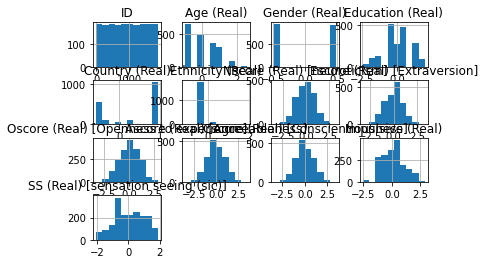

In [241]:
data_with_headers.hist()

In [242]:
def split_labels(data, label_feature):
    """
    Split the given column of of the data, returning the full data set (without that
    feature) and the split off feature.
    """
    return data.drop(columns=label_feature, axis=0), data[label_feature]

X, y = split_labels(data_with_headers, 'Heroin')
# Split off the training set from the testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

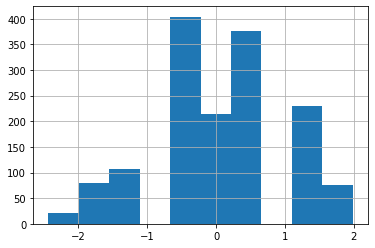

In [243]:
X_train['Education (Real)'].hist()

In [244]:
X_train["Cannabis"].value_counts(), X_train["Crack"].value_counts(), X_train["Ketamine"].value_counts(),  X_train["Semer"].value_counts()

(CL6    371
 CL0    327
 CL2    211
 CL1    179
 CL3    154
 CL5    153
 CL4    113
 Name: Cannabis, dtype: int64,
 CL0    1293
 CL2      90
 CL1      59
 CL3      50
 CL5       8
 CL4       7
 CL6       1
 Name: Crack, dtype: int64,
 CL0    1182
 CL2     120
 CL3     106
 CL1      41
 CL4      34
 CL5      22
 CL6       3
 Name: Ketamine, dtype: int64,
 CL0    1501
 CL3       2
 CL2       2
 CL1       2
 CL4       1
 Name: Semer, dtype: int64)

# Summary 

1. 31 Features, 1885 Samples
2. ID is an INT64, 
3. AGE, GENDER, EDUCATION, COUNTRY, ETHNICITY, are FLOAT64, have designated value for things (.48 = Female, -.48 mile)
4. Nscore, Escore, Oscore, Ascore, Cscore, Impuslive, SS are FLOAT64 to meaurse personality types
5. The Rest Alchohol..Caff..Choc.. are objects that contain a value a "C0" to "C6" to represent the different usages 


In [245]:
data = X_train.copy()

In [246]:
data

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1814,1818,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540,CL4,CL2,CL0,CL2,CL5,CL6,CL4,CL2,CL2,CL2,CL0,CL3,CL0,CL2,CL0,CL4,CL0,CL2
710,713,-0.07854,0.48246,1.16365,0.96082,-0.31685,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593,CL4,CL3,CL0,CL2,CL5,CL3,CL5,CL2,CL0,CL3,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL0
931,935,-0.95197,0.48246,0.45468,0.96082,-0.31685,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593,CL5,CL0,CL0,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
617,620,-0.07854,0.48246,0.45468,0.96082,-0.31685,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987,CL5,CL0,CL2,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1797,1801,1.09449,-0.48246,-0.61113,-0.57009,-0.31685,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470,CL2,CL1,CL0,CL3,CL6,CL1,CL4,CL1,CL0,CL0,CL0,CL0,CL1,CL6,CL1,CL0,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1134,-0.07854,-0.48246,1.16365,-0.46841,-0.31685,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575,CL6,CL2,CL3,CL6,CL6,CL6,CL6,CL3,CL0,CL2,CL2,CL6,CL2,CL3,CL3,CL3,CL0,CL6
1294,1298,-0.95197,-0.48246,-0.61113,-0.57009,0.11440,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470,CL4,CL3,CL0,CL3,CL3,CL6,CL6,CL3,CL3,CL3,CL2,CL3,CL3,CL3,CL3,CL5,CL0,CL0
860,864,-0.95197,-0.48246,0.45468,0.96082,-0.31685,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470,CL6,CL2,CL2,CL2,CL3,CL6,CL4,CL4,CL2,CL2,CL2,CL2,CL4,CL2,CL2,CL4,CL0,CL0
1459,1463,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148,CL5,CL0,CL2,CL0,CL6,CL3,CL5,CL3,CL0,CL2,CL0,CL2,CL0,CL5,CL0,CL6,CL0,CL0


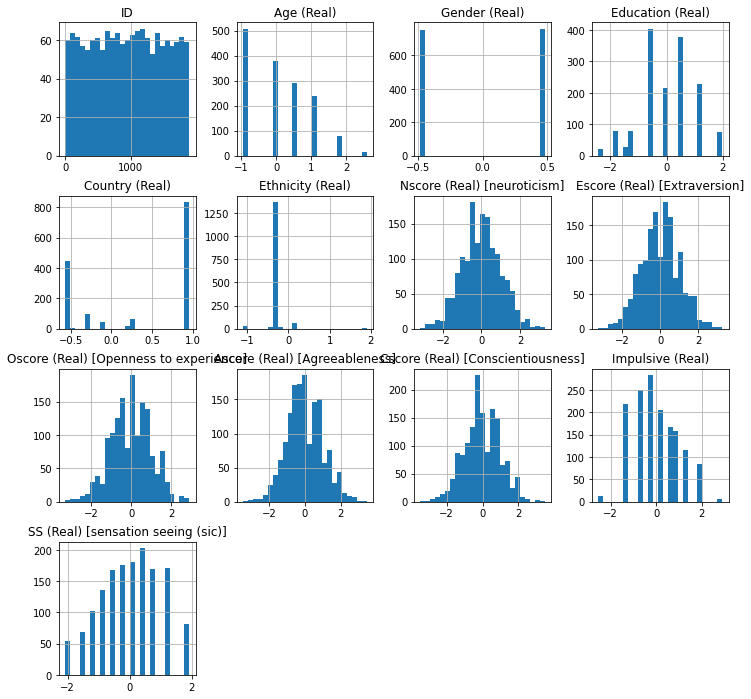

In [247]:
# View all of the histograms (except categorical)
# We discover most are log-normally distributed
data.hist(bins=25, figsize=(12, 12));

In [248]:
data

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1814,1818,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540,CL4,CL2,CL0,CL2,CL5,CL6,CL4,CL2,CL2,CL2,CL0,CL3,CL0,CL2,CL0,CL4,CL0,CL2
710,713,-0.07854,0.48246,1.16365,0.96082,-0.31685,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593,CL4,CL3,CL0,CL2,CL5,CL3,CL5,CL2,CL0,CL3,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL0
931,935,-0.95197,0.48246,0.45468,0.96082,-0.31685,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593,CL5,CL0,CL0,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
617,620,-0.07854,0.48246,0.45468,0.96082,-0.31685,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987,CL5,CL0,CL2,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1797,1801,1.09449,-0.48246,-0.61113,-0.57009,-0.31685,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470,CL2,CL1,CL0,CL3,CL6,CL1,CL4,CL1,CL0,CL0,CL0,CL0,CL1,CL6,CL1,CL0,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1134,-0.07854,-0.48246,1.16365,-0.46841,-0.31685,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575,CL6,CL2,CL3,CL6,CL6,CL6,CL6,CL3,CL0,CL2,CL2,CL6,CL2,CL3,CL3,CL3,CL0,CL6
1294,1298,-0.95197,-0.48246,-0.61113,-0.57009,0.11440,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470,CL4,CL3,CL0,CL3,CL3,CL6,CL6,CL3,CL3,CL3,CL2,CL3,CL3,CL3,CL3,CL5,CL0,CL0
860,864,-0.95197,-0.48246,0.45468,0.96082,-0.31685,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470,CL6,CL2,CL2,CL2,CL3,CL6,CL4,CL4,CL2,CL2,CL2,CL2,CL4,CL2,CL2,CL4,CL0,CL0
1459,1463,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148,CL5,CL0,CL2,CL0,CL6,CL3,CL5,CL3,CL0,CL2,CL0,CL2,CL0,CL5,CL0,CL6,CL0,CL0


In [249]:
personality_labels = ['Escore (Real) [Extraversion]','Oscore (Real) [Openness to experience]','Ascore (Real) [Agreeableness]','Cscore (Real) [Conscientiousness]','Impulsive (Real)','SS (Real) [sensation seeing (sic)]']
drug_labels = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Crack', 'Ecstacy',  'Ketamine', 'Legalh', 'LSD',
       'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
numerical_values = ['Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'ID', 'Age (Real)', 'Gender (Real)', 'Education (Real)',
       'Country (Real)', 'Ethnicity (Real)']


In [250]:
from collections import Counter

In [251]:
alchocoh = Counter(data['Alcohol'])


array([[<AxesSubplot:title={'center':'Escore (Real) [Extraversion]'}>,
        <AxesSubplot:title={'center':'Oscore (Real) [Openness to experience]'}>],
       [<AxesSubplot:title={'center':'Ascore (Real) [Agreeableness]'}>,
        <AxesSubplot:title={'center':'Cscore (Real) [Conscientiousness]'}>],
       [<AxesSubplot:title={'center':'Impulsive (Real)'}>,
        <AxesSubplot:title={'center':'SS (Real) [sensation seeing (sic)]'}>]],
      dtype=object)

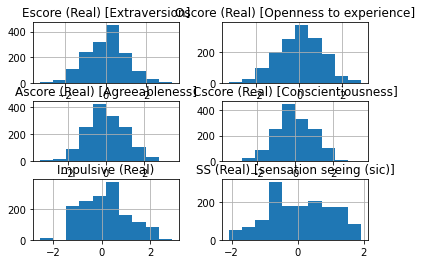

In [252]:
data[personality_labels].hist()

<AxesSubplot:>

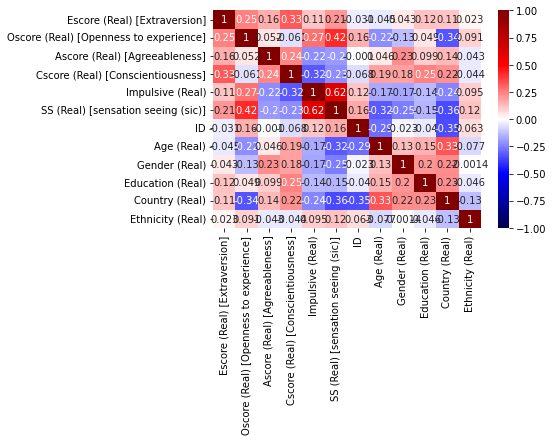

In [253]:
plt.figure(figsize=(6, 4))
# Split train test data off
sns.heatmap(data[numerical_values].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

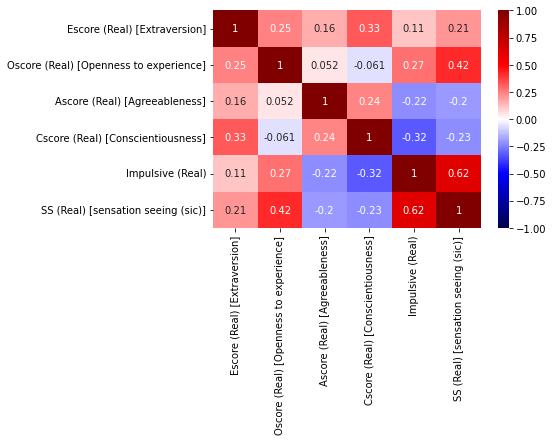

In [254]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[personality_labels].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

<AxesSubplot:>

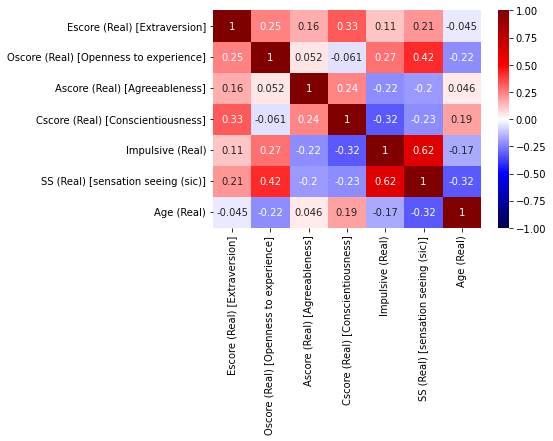

In [255]:
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Escore (Real) [Extraversion]', 'Oscore (Real) [Openness to experience]', 'Ascore (Real) [Agreeableness]', 'Cscore (Real) [Conscientiousness]', 'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Age (Real)']].corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')


In [256]:
list_of_drugs = ['Coke', 'Meth',  'Cannabis', 'Ecstacy', 'Benzos', 'Alcohol', 'Amphet', 'Amyl', 'LSD', 'Legalh', 'Semer', 'VSA']

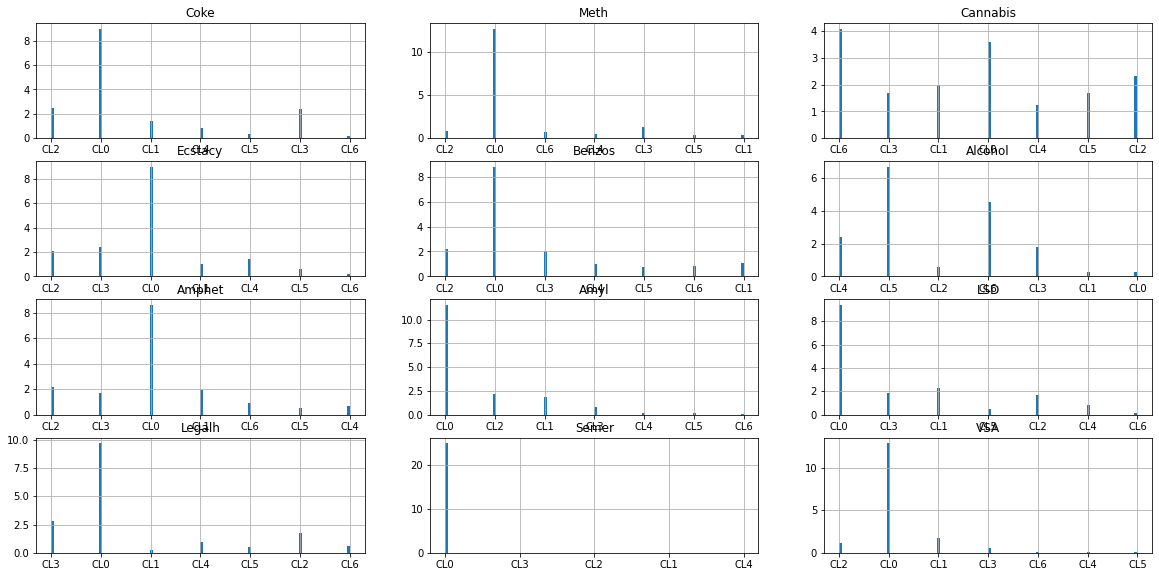

In [257]:
# Distances
plt.figure(figsize=(20, 25))

for i in range(len(list_of_drugs)):
    plt.subplot(10, 3, i+1)
    plt.title(list_of_drugs[i])
    data[list_of_drugs[i]].hist(bins=100, density=True)
    # plt.ylabel("Percent of trips")


In [258]:
data.head(10)

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1814,1818,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540,CL4,CL2,CL0,CL2,CL5,CL6,CL4,CL2,CL2,CL2,CL0,CL3,CL0,CL2,CL0,CL4,CL0,CL2
710,713,-0.07854,0.48246,1.16365,0.96082,-0.31685,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593,CL4,CL3,CL0,CL2,CL5,CL3,CL5,CL2,CL0,CL3,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL0
931,935,-0.95197,0.48246,0.45468,0.96082,-0.31685,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593,CL5,CL0,CL0,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
617,620,-0.07854,0.48246,0.45468,0.96082,-0.31685,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987,CL5,CL0,CL2,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1797,1801,1.09449,-0.48246,-0.61113,-0.57009,-0.31685,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470,CL2,CL1,CL0,CL3,CL6,CL1,CL4,CL1,CL0,CL0,CL0,CL0,CL1,CL6,CL1,CL0,CL0,CL1
271,272,1.09449,0.48246,1.16365,0.96082,-0.31685,0.73545,-0.69509,0.44585,0.28783,-1.38502,-0.71126,0.76540,CL6,CL1,CL1,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL1,CL0,CL2,CL1,CL2,CL0,CL0
184,185,1.82213,-0.48246,-1.22751,0.96082,-0.31685,0.04257,-0.80615,-0.97631,0.59042,0.25953,-1.37983,-1.18084,CL6,CL0,CL0,CL0,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
1176,1180,-0.07854,0.48246,1.16365,-0.57009,-0.31685,2.12700,0.47617,1.88511,-2.78793,-1.25773,1.86203,1.92173,CL4,CL6,CL0,CL4,CL6,CL4,CL6,CL4,CL0,CL1,CL1,CL4,CL1,CL4,CL0,CL3,CL0,CL2
244,245,0.49788,-0.48246,0.45468,0.96082,-0.31685,1.98437,-1.50796,-0.17779,1.11406,-2.90161,-0.71126,-0.52593,CL5,CL0,CL0,CL3,CL6,CL1,CL6,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
968,972,0.49788,0.48246,0.45468,0.24923,-0.31685,0.22393,0.00332,-0.17779,-0.60633,-0.52745,0.88113,0.76540,CL5,CL1,CL0,CL0,CL4,CL6,CL5,CL4,CL0,CL4,CL3,CL5,CL5,CL0,CL4,CL5,CL0,CL0


Prepreare the Data
=====

In [259]:
# Separate the labels (and use the fresh data, not explored-on data)
X_train = X_train.copy()


In [260]:
X_train

,ID,Age (Real),Gender (Real),Education (Real),Country (Real),Ethnicity (Real),Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)],Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1814,1818,-0.95197,0.48246,-0.61113,-0.57009,0.11440,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540,CL4,CL2,CL0,CL2,CL5,CL6,CL4,CL2,CL2,CL2,CL0,CL3,CL0,CL2,CL0,CL4,CL0,CL2
710,713,-0.07854,0.48246,1.16365,0.96082,-0.31685,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593,CL4,CL3,CL0,CL2,CL5,CL3,CL5,CL2,CL0,CL3,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL0
931,935,-0.95197,0.48246,0.45468,0.96082,-0.31685,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593,CL5,CL0,CL0,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
617,620,-0.07854,0.48246,0.45468,0.96082,-0.31685,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987,CL5,CL0,CL2,CL0,CL6,CL3,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1797,1801,1.09449,-0.48246,-0.61113,-0.57009,-0.31685,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470,CL2,CL1,CL0,CL3,CL6,CL1,CL4,CL1,CL0,CL0,CL0,CL0,CL1,CL6,CL1,CL0,CL0,CL1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1134,-0.07854,-0.48246,1.16365,-0.46841,-0.31685,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575,CL6,CL2,CL3,CL6,CL6,CL6,CL6,CL3,CL0,CL2,CL2,CL6,CL2,CL3,CL3,CL3,CL0,CL6
1294,1298,-0.95197,-0.48246,-0.61113,-0.57009,0.11440,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470,CL4,CL3,CL0,CL3,CL3,CL6,CL6,CL3,CL3,CL3,CL2,CL3,CL3,CL3,CL3,CL5,CL0,CL0
860,864,-0.95197,-0.48246,0.45468,0.96082,-0.31685,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470,CL6,CL2,CL2,CL2,CL3,CL6,CL4,CL4,CL2,CL2,CL2,CL2,CL4,CL2,CL2,CL4,CL0,CL0
1459,1463,-0.07854,-0.48246,1.16365,0.96082,-0.31685,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148,CL5,CL0,CL2,CL0,CL6,CL3,CL5,CL3,CL0,CL2,CL0,CL2,CL0,CL5,CL0,CL6,CL0,CL0


In [261]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
# Transformers go in this cell
"""
2. Age (Real) is age of participant and has one of the values:
Value Meaning Cases Fraction
-0.95197 18-24 643 34.11%
-0.07854 25-34 481 25.52%
0.49788 35-44 356 18.89%
1.09449 45-54 294 15.60%
1.82213 55-64 93 4.93%
2.59171 65+ 18 0.95% 
{}
"""

# Column Transformers
class DropBadRowsTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, column_to_drop_from, value_to_drop):
        super().__init__()
        self.column_to_drop_from = column_to_drop_from
        self.value_to_drop = value_to_drop

    def fit(self, X, y=None):
        rows_to_drop = X[X[self.column_to_drop_from] != self.value_to_drop].index
        X.drop(rows_to_drop, inplace=True)
        y.drop(rows_to_drop, inplace=True)
        return self

    def transform(self, X, y=None):
        return X

class ProtectXy(BaseEstimator, TransformerMixin):
    """
    Due to all the sketchy stuff the other transformers do in fit(), we
    need a way to protect the fact that those datasets are constantly
    changing but we don't want to change the global datasets.

    All of this is to work around the limitation that the transform()
    method doesn't have a y parameter...
    """
    def __init__(self):
        super().__init__()
        self.X_ref_ = None
        self.y_ref_ = None

    def fit(self, X, y=None, **kwargs):
        if self.X_ref_ is X and self.y_ref_ is y:
            X._update_inplace(self.X_copy_)
            y._update_inplace(self.y_copy_)
        else:
            self.X_ref_, self.y_ref_ = X, y
            self.X_copy_, self.y_copy_ = X.copy(), y.copy()
        return self

    def transform(self, X): return X  # due to the need for modifying and using the y variable, the work is done above

class ConvertRealClassificationValuesToHumanReadableStrings(BaseEstimator, TransformerMixin):
    
    def __init__(self, label_map=None):
        super().__init__()
        self.label_map = label_map
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # Replace 'real' scores with their categorical string
        return X.applymap(lambda x: self.label_map[x])


class ClassifierToNumericalValueTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_apply_to=None, classifications_kept=None):
        super().__init__()
        # Transform_columns is a list of column header strings to which to apply the transformation
        # Classifications kept is a list of strings correlating to the classification level
        self.features_to_apply_to = features_to_apply_to
        self.classifications_kept = classifications_kept

    def fit(self, X, y=None, **kwargs):
        # for feature in self.features_to_apply_to:
        #     if y is not None and feature in y.columns:
        #         y[feature] = y[feature].apply(lambda x: 1 if x in self.classifications_kept else 0)
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for feature in self.features_to_apply_to:
            X[feature] = X[feature].apply(lambda x: 1 if x in self.classifications_kept else 0)
        return X


class AddNewFeatureFromSeveralLabelsTransformer(BaseEstimator, TransformerMixin):
    """
    # data_headers_modded['Hallucinogenic User'] = np.any([(data_headers_modded[column] == 1) for column in ['Ketamine', 'LSD', 'Mushrooms']], axis=0)
    """
    def __init__(self, new_column, several_labels):
        super().__init__()
        self.new_column = new_column
        self.several_labels = several_labels

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X, y=None):
        print(self.new_column)
        X[self.new_column] = np.any([(X[label] == 1) for label in self.several_labels], axis=0)
        return X


class IsCollegeEducated():
    def __init__(self):
        super().__init__()
        self.college_education = ['Bachelor\'s', 'Master\'s', 'Ph.D.']

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X, y=None):
        return X.isin(self.college_education)
class IsHighSchoolDropout():
    def __init__(self):
        super().__init__()
        # TODO: add to the assumptions that early graduations go on to become college educated
        self.dropout_years = ['<16 yrs old', '16 yrs old', '17 yrs old']

    def fit(self, X, y=None, **kwargs):
        return self

    def transform(self, X, y=None):
        return X.isin(self.dropout_years)



In [262]:
# Fix the display
pd.set_option('max_columns', None)
# Load in the data and fix the header names
data = pd.read_csv('drug_consumption_with_headers.data')
data = data.rename(columns=lambda x: x.strip()) # Remove extra spaces from headers
# Split off the label we are trying to predict
X, y = split_labels(data, 'Heroin')
# Split off the training set from the testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
X_train.shape ,  y_train.shape

((1508, 31), (1508,))

In [263]:
drug_labels = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
              'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', #'Heroin',
              'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 
              'Nicotine', 'VSA']
# 'CL0' is the lowest classification level, 'CL6' is the highest
# CL0 Never Used
# CL1 Used over a Decade Ago
# CL2 Used in Last Decade 
# CL3 Used in Last Year 
# CL4 Used in Last Month
# CL5 Used in Last Week 
# CL6 Used in Last Day
user_classifications =  ['CL3', 'CL4', 'CL5', 'CL6']
label_map_age = {
            -0.95197: '18-24', 
            -0.07854: '25-34', 
            0.49788: '35-44', 
            1.09449: '45-54', 
            1.82213: '55-64', 
            2.59171: '65+'
}
label_map_edu = {
            -2.43591: '<16 yrs old',
            -1.73790: '16 yrs old',
            -1.43719: '17 yrs old',
            -1.22751: '18 yrs old',
            -0.61113: 'Some college or uni., no cert. or degree',
            -0.05921: 'Prof. cert./diploma',
            0.45468: 'Bachelor\'s',
            1.16365: 'Master\'s',
            1.98437: 'Ph.D.'
}
label_map_gender = {
    -0.48246: 0,
    0.48246: 1
}
edu_labels = list(label_map_edu.values())
age_labels = list(label_map_age.values())
all_labels = X_train.columns

In [264]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [265]:
labels_personality = ['Nscore (Real) [neuroticism]',
       'Escore (Real) [Extraversion]',
       'Oscore (Real) [Openness to experience]',
       'Ascore (Real) [Agreeableness]', 
       'Cscore (Real) [Conscientiousness]',
       'Impulsive (Real)', 
       'SS (Real) [sensation seeing (sic)]']

labels_remaining =  ['is_college_educated', 'is_high_school_dropout'] + \
              list(label_map_edu.values()) + list(label_map_age.values()) + \
              [ 'Gender (Real)', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 
              'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', 'Ketamine', 'Legalh', 
              'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA' ] + labels_personality

In [266]:
# Create a pipeline that drops any samples with a 'Semer' value that is not CL0 and then drops the 'Semer' column
pipeline = Pipeline(steps=[
    ('protect_xy', ProtectXy()),
    ('drop_semer_samples', DropBadRowsTransformer('Semer', 'CL0')),
    ('col_trans', ColumnTransformer(transformers=[
        ('drop_unneeded', 'drop', ['Semer', 'ID',  'Country (Real)', 'Ethnicity (Real)']),
        ('edu_feature_pl_college_educated', Pipeline(steps=[
            ('convert_edu_real_values_to_human_readable_string_1', ConvertRealClassificationValuesToHumanReadableStrings(label_map=label_map_edu)),
            ('add_new_feature_college_educated', IsCollegeEducated()),
        ]), ['Education (Real)']),
        ('edu_features_pl_highschool_dropout', Pipeline(steps=[
            ('convert_edu_real_values_to_human_readable_string_1', ConvertRealClassificationValuesToHumanReadableStrings(label_map=label_map_edu)),
            ('add_new_feature_highschool_dropout', IsHighSchoolDropout()),
        ]), ['Education (Real)']),
        ('edu_encoding_pl', Pipeline([
            ('convert_edu_real_values_to_human_readable_string_2', ConvertRealClassificationValuesToHumanReadableStrings(label_map=label_map_edu)),
            ('one_hot_encoding_edu', OneHotEncoder(drop=None, categories=[edu_labels])),
        ]), ['Education (Real)']),
        ('age', Pipeline([  
            ('convert_age_real_values_to_human_readable_string', ConvertRealClassificationValuesToHumanReadableStrings(label_map=label_map_age)),
            ('one_hot_encoding_age', OneHotEncoder(drop=None, categories=[age_labels])),
        ]), ['Age (Real)']),
        ('gender', Pipeline(steps=[
            ('convert_gender_real_vals_to_binary', ConvertRealClassificationValuesToHumanReadableStrings(label_map=label_map_gender)),
        ]), ['Gender (Real)']),
        ('drug_classifications_to_users_pl', Pipeline(steps=[
            ('classification_to_num_val', ClassifierToNumericalValueTransformer(features_to_apply_to=drug_labels, classifications_kept=user_classifications))]),
        ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstacy', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']),
    ], remainder='passthrough')),
])
data = pd.DataFrame(pipeline.fit_transform(X_train,y_train), columns=labels_remaining)
data

,is_college_educated,is_high_school_dropout,<16 yrs old,16 yrs old,17 yrs old,18 yrs old,"Some college or uni., no cert. or degree",Prof. cert./diploma,Bachelor's,Master's,Ph.D.,18-24,25-34,35-44,45-54,55-64,65+,Gender (Real),Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575
1497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470
1498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470
1499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148


In [154]:

# # education_data = pd.DataFrame(data_new_copy['Education (Real)'], columns=['Education (Real)']) # Save to reattach for validation after the transform
# # education = 'Education (Real)'

# # age_data = pd.DataFrame(data_new_copy['Age (Real)'], columns=['Age (Real)']) # Save to reattach for validation after the transform
# # age = 'Age (Real)'
# #
# pipeline1 = Pipeline(steps=[
# #     ('col_trans', ColumnTransformer(transformers=[
# #     #     ('edu', Pipeline([
# #     #         # print('beginning')
# #     #         ('convert_age_real_values_to_human_readable_string', ConvertRealClassificationValuesToHumanReadableStrings(education, label_map_edu)),
# #     #         # print('first')
# #     #         ('one_hot_encoding_edu', OneHotEncoder(drop=None, categories=[edu_labels])),
# #     #         # print('second')
# #     #         ('convert_edu_data_type', ConvertDataType(education,label_map_edu,education_data, original_columns)),
# #     #         # print('third')

            
# #     #     ])),
# #         ('age', Pipeline([
# #             ('convert_edu_real_values_to_human_readable_string', ConvertRealClassificationValuesToHumanReadableStrings('Age (Real)',label_map_age)),
# #             ('one_hot_encoding_age', OneHotEncoder(drop=None, categories=[age_labels])),
# #             ('convert_edu_data_type', ConvertDataType('Age (Real)',original_columns, age_labels, age_data)),
 

# #             ]), ['Age (Real)']),
# #             ], remainder='passthrough')),
    
#         # ('convert_age_real_values_to_human_readable_string', ConvertRealClassificationValuesToHumanReadableStrings('Age (Real)', label_map_age)),
        
#         # ('convert_gender_real_values_to_zeros_ones', ConvertGenderRealToBinary()),
#         # ('convert_edu_real_values_to_human_readable_string', ConvertRealClassificationValuesToHumanReadableStrings('Education (Real)', label_map_edu)),
#         # ('add_new_feature_college_educated', IsCollegeEducated()),
#         # ('add_new_feature_highschool_dropout', IsHighSchoolDropout()),
#         ('change_classifications_to_nums', ClassifierToNumericalValueTransformer(drug_labels, ['CL3', 'CL4', 'CL5', 'CL6'])),
#         # ('imputer', NumpyArrayToPandasDataFrame(SimpleImputer(strategy='median'))),
#         ('drop', ColumnTransformer(transformers=[
#         ('drop columns', 'drop', ['Country (Real)', 'Ethnicity (Real)', 'ID'] )], remainder='passthrough')),
#         # ('scaler',(StandardScaler()))
#         ('scaler', (StandardScaler()))
#         # ('drop_features_after_used', DropColumnsTransformer(columns_to_drop=['Education (Real)', 'Age (Real)'])), 
# ])

# # data.info()

# # # Convert back to DF
# # original_columns_minus_edu_real = [col for col in original_columns if col != 'Age (Real)']
# # data_new_copy = pd.DataFrame(data_new_copy, columns=age_labels+original_columns_minus_edu_real)
# # data_new_copy['Age (Real)'] = age_data['Age (Real)'].values

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 42 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   is_college_educated                       1501 non-null   float64
 1   is_high_school_dropout                    1501 non-null   float64
 2   <16 yrs old                               1501 non-null   float64
 3   16 yrs old                                1501 non-null   float64
 4   17 yrs old                                1501 non-null   float64
 5   18 yrs old                                1501 non-null   float64
 6   Some college or uni., no cert. or degree  1501 non-null   float64
 7   Prof. cert./diploma                       1501 non-null   float64
 8   Bachelor's                                1501 non-null   float64
 9   Master's                                  1501 non-null   float64
 10  Ph.D.                               

In [40]:
# df_type_dict = {
#     # '18-24': float, 
#     # '25-34': float, 
#     # '35-44': float, 
#     # '45-54': float, 
#     # '55-64': float, 
#     # '65+': float, 
#     # '<16 yrs old': float,
#     # '16 yrs old': float,
#     # '17 yrs old': float, 
#     # '18 yrs old': float,
#     # 'Some college or uni., no cert. or degree': float,
#     # 'Prof. cert./diploma': float,
#     # 'Bachelor\'s': float, 
#     # 'Master\'s': float, 
#     # 'Ph.D.': float, 
#     'Age': float,
#     'Gender (Real)': float,
#     'Education (Real)': float, 
#     'Nscore (Real) [neuroticism]': float, 
#     'Escore (Real) [Extraversion]': float,
#     'Oscore (Real) [Openness to experience]': float,
#     'Ascore (Real) [Agreeableness]': float, 
#     'Cscore (Real) [Conscientiousness]': float,
#     'Impulsive (Real)': float, 
#     'SS (Real) [sensation seeing (sic)]': float, 
#     'Alcohol': float,
#     'Amphet': float, 
#     'Amyl': float, 
#     'Benzos': float, 
#     'Caff': float, 
#     'Cannabis': float, 
#     'Choc': float, 
#     'Coke': float, 
#     'Crack': float,
#     'Ecstacy': float, 
#     'Heroin': float, 
#     'Ketamine': float, 
#     'Legalh': float, 
#     'LSD': float, 
#     'Meth': float, 
#     'Mushrooms': float,
#     'Nicotine': float, 
#     'Semer': float, 
#     'VSA': float, 

#     # 'College educated': bool, 
#     # 'Highschool Dropout': bool, 
#     # 'hallucinogenics_user': bool, 
#     # 'casual_drug_user': bool, 
#     # 'hard_drug_user': bool
# }

In [41]:
# data_new_copy = data.astype(df_type_dict)
# data_new_copy.info()

In [42]:
numerical_val = ['18-24', '25-34', '35-44','55-64', '65+', '<16 yrs old',
       '18 yrs old',
       'Some college or uni., no cert. or degree', 'Prof. cert./diploma',
       'Gender (Real)',
       'Nscore (Real) [neuroticism]',
       'Oscore (Real) [Openness to experience]',
       'Impulsive (Real)', 'SS (Real) [sensation seeing (sic)]', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstacy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'College educated', 'Highschool Dropout',
       'hallucinogenics_user', 'hard_drug_user', 'casual_inclusive',
       'casual_drug_user']

In [43]:
# y_train

In [44]:
y

303     CL0
1583    CL0
124     CL0
1117    CL0
163     CL0
       ... 
1130    CL2
1294    CL3
860     CL0
1459    CL0
1126    CL0
Name: Heroin, Length: 1696, dtype: object

In [157]:
y_train_true = (y_train == "CL3") #once the pipeline is set up, this will be equal to 1 , to only get the instances of true heroin usage
# y_train_true.head(n=40) 
y_test_true = (y_train == "CL3") #once the pipeline is set up, this will be equal to 1 , to only get the instances of true heroin usage

# y_test.head(n=50)

In [158]:
y_train

1814    CL0
710     CL0
931     CL0
617     CL0
1797    CL0
       ... 
1130    CL2
1294    CL3
860     CL0
1459    CL0
1126    CL0
Name: Heroin, Length: 1501, dtype: object

In [159]:
y_train_true

1814    False
710     False
931     False
617     False
1797    False
        ...  
1130    False
1294     True
860     False
1459    False
1126    False
Name: Heroin, Length: 1501, dtype: bool

Performance Measure 
===

In [267]:
data

,is_college_educated,is_high_school_dropout,<16 yrs old,16 yrs old,17 yrs old,18 yrs old,"Some college or uni., no cert. or degree",Prof. cert./diploma,Bachelor's,Master's,Ph.D.,18-24,25-34,35-44,45-54,55-64,65+,Gender (Real),Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575
1497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470
1498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470
1499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148


In [161]:
y_train_true

1814    False
710     False
931     False
617     False
1797    False
        ...  
1130    False
1294     True
860     False
1459    False
1126    False
Name: Heroin, Length: 1501, dtype: bool

In [138]:
# # Separate the labels (and use the fresh data, not explored-on data)
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")

In [162]:
from sklearn.linear_model import LogisticRegression

In [163]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV




In [164]:
"""Logistic Regression
Used to estimate the probability that an instance belongs to a particular class 
(e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, 
then the model predicts that the instance belongs to that class (called the positive class, labeled “1”),
 and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). 
 """
# Separate the labels (and use the fresh data, not explored-on data)


log_reg = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('log-regress', LogisticRegression(max_iter=150))
]).fit(X_train, y_train_true)



In [165]:
"""Logistic Regression
Used to estimate the probability that an instance belongs to a particular class 
(e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, 
then the model predicts that the instance belongs to that class (called the positive class, labeled “1”),
 and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). 
 """
# Separate the labels (and use the fresh data, not explored-on data)

log_reg = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('log-regress', LogisticRegression())
]).fit(X_train, y_train_true)


"""SGD Classifier"""
"""This classifier has the advantage of being capable of handling very large datasets efficiently.
This is in part because SGD deals with training instances independently, one at a time 
The SGDClassifier relies on randomness during training"""
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")

sgd_clf = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('SGD CLF', SGDClassifier(random_state=42))
]).fit(X_train, y_train_true)

"both bagging and pasting allow training instances to be sampled several times across multiple predictors, "
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")
bag_clf = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('bag-class', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=500, max_samples=0.2, bootstrap=False,n_jobs=-1))
]).fit(X_train, y_train_true)


" If the training set is not too large," 
"you should also try the Gaussian RBF kernel; it works well in most cases."
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")
rbf_kernel_svm_clf = Pipeline([
        ("scaler", pipeline),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
]).fit(X_train, y_train_true)


"""Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset 
and takes the average to improve the predictive accuracy of that dataset."
Instead of relying on one decision tree, the random forest takes the prediction 
from each tree and based on the majority votes of predictions, and it predicts the final output."""

# data = train_set.copy()
# X, y = split_labels(data, "Heroin")

forest_clf = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('random-forest', RandomForestClassifier(n_estimators=500, max_depth=4, n_jobs=-1))
]).fit(X_train, y_train_true)


"This strategy consists in fitting one classifier per class pair."
"At prediction time, the class which received the most votes is selected."
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")

OVO = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('ovo', OneVsOneClassifier(SVC()))
]).fit(X_train, y_train_true)


"One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted."
"This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost."
"when training an AdaBoost classifier, the algorithm first trains a base classifier (such as a Decision Tree) and "
"uses it to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances. "
"Then it trains a second classifier, using the updated weights, and again makes predictions on the training set, updates the instance weights"

# data = train_set.copy()
# X, y = split_labels(data, "Heroin")

ada_clf = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('ada-class', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, learning_rate=0.5))
]).fit(X_train, y_train_true)

In [166]:
classifiers = {'Logistic Regressor': log_reg,
                'SGD Classifier': sgd_clf,
               'Bagging Classifier': bag_clf, 
               'SVM Classifier': rbf_kernel_svm_clf, 
               'Random Forest Classifiers': forest_clf, 
               'OVO': OVO,
               'Ada Classifier': ada_clf}

In [168]:
# data = X_train.copy()
# X, y = split_labels(data, "Heroin")
"cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training)."

for clf_name, classifier in classifiers.items(): # Separate the labels (and use the fresh data, not explored-on data)
    # data = X_train.copy()
    # X, y = split_labels(data, "Heroin")
    y_pred = cross_val_predict(classifier, X_train, y_train_true, cv=3)
    metric = accuracy_score(y_train_true, y_pred) 
    print(clf_name, metric)

Logistic Regressor 0.9626915389740173
SGD Classifier 0.9407061958694204
Bagging Classifier 0.9646902065289806
SVM Classifier 0.9646902065289806
Random Forest Classifiers 0.9646902065289806
OVO 0.9646902065289806
Ada Classifier 0.9526982011992006


In [170]:
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")
"""# Confusion Matrix 
The general idea is to count the number of times instances of class A are classified as class B
Need to have a set of predictions so that they can be compared to the actual targets

cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training)."""

for clf_name, classifier in classifiers.items(): 
    # Separate the labels (and use the fresh data, not explored-on data)
    data = X_train.copy()
    # X, y = split_labels(data, "Heroin")
    y_pred = cross_val_predict(classifier, X_train, y_train_true, cv=3)
    """Each row in a confusion matrix represents an actual class, while each column represents a predicted class."""
    l = confusion_matrix(y_train_true, y_pred=y_pred) 
    print(clf_name, l)


"""Top left is correctly classified as negative (true negative)
    Top Right is wrongly classified as positive (False positive )
    Bottom Left is Wrongly class
    ified as negative (false negative)
    Bottom Right is correctly classified as positive (True positive)
"""
l

Logistic Regressor [[1442    6]
 [  50    3]]
SGD Classifier [[1403   45]
 [  44    9]]
Bagging Classifier [[1448    0]
 [  53    0]]
SVM Classifier [[1448    0]
 [  53    0]]
Random Forest Classifiers [[1448    0]
 [  53    0]]
OVO [[1448    0]
 [  53    0]]
Ada Classifier [[1426   22]
 [  49    4]]


array([[1426,   22],
       [  49,    4]])

In [172]:
classifiers = {'Logistic Regressor': log_reg,
                'SGD Classifier': sgd_clf,
               'Ada Classifier': ada_clf}

In [173]:
# data = train_set.copy()
# X, y = split_labels(data, "Heroin")
"""# Cross Val  
The general idea is to count the number of times instances of class A are classified as class B
Need to have a set of predictions so that they can be compared to the actual targets

cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training)."""

for clf_name, classifier in classifiers.items(): 
    # Separate the labels (and use the fresh data, not explored-on data)
    # data = train_set.copy()
    # X, y = split_labels(data, "Heroin")
    y_pred = cross_val_predict(classifier, X_train, y_train_true, cv=3)
    
    p = precision_score(y_train_true, y_pred) # == 4096 / (4096 + 1522)

    r  = recall_score(y_train_true, y_pred) # == 4096 / (4096 + 1325)

    f = f1_score(y_train_true, y_pred )
    print(clf_name, "prescion", p)
    print(clf_name, "recall", r)
    print(clf_name, "f1score", f)


Logistic Regressor prescion 0.3333333333333333
Logistic Regressor recall 0.05660377358490566
Logistic Regressor f1score 0.0967741935483871
SGD Classifier prescion 0.16666666666666666
SGD Classifier recall 0.16981132075471697
SGD Classifier f1score 0.16822429906542055
Ada Classifier prescion 0.15384615384615385
Ada Classifier recall 0.07547169811320754
Ada Classifier f1score 0.10126582278481013


In [176]:
"""Using SGD Classifier now """
sgd_clf = Pipeline(steps=[
    ('preprocessor', pipeline), 
    ('sgd clf', SGDClassifier(random_state=42))
]).fit(X_train, y_train_true)



In [177]:
sgd_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'sgd clf', 'preprocessor__memory', 'preprocessor__steps', 'preprocessor__verbose', 'preprocessor__protect_xy', 'preprocessor__drop_semer_samples', 'preprocessor__col_trans', 'preprocessor__drop_semer_samples__column_to_drop_from', 'preprocessor__drop_semer_samples__value_to_drop', 'preprocessor__col_trans__n_jobs', 'preprocessor__col_trans__remainder', 'preprocessor__col_trans__sparse_threshold', 'preprocessor__col_trans__transformer_weights', 'preprocessor__col_trans__transformers', 'preprocessor__col_trans__verbose', 'preprocessor__col_trans__verbose_feature_names_out', 'preprocessor__col_trans__drop_unneeded', 'preprocessor__col_trans__edu_feature_pl_college_educated', 'preprocessor__col_trans__edu_features_pl_highschool_dropout', 'preprocessor__col_trans__edu_encoding_pl', 'preprocessor__col_trans__age', 'preprocessor__col_trans__gender', 'preprocessor__col_trans__drug_classifications_to_users_pl', 'preprocessor__col_trans__e

In [178]:
param_grid = [
   {
   # # 'random-forest__oob_score': [True, False], 
   # #  'random-forest__n_estimators': [50, 75, 100, 125, 150], 
   # #  'random-forest__max_depth': [4, 5, 6, 7, 8], 
   #  'Log Reg__n_jobs': [10, 15, 20, 25, 30], 
   'sgd clf__n_iter_no_change': [10,15,30,45,60],
   'sgd clf__loss': ['hinge', 'log', 'modified_huber'],
   'sgd clf__fit_intercept': [True, False],
   'sgd clf__random_state': [True, False],
   'sgd clf__n_jobs': [10,15,30,45,60]


   }]

   


In [221]:

search = GridSearchCV(
    sgd_clf, param_grid,
    cv=3, scoring='accuracy', return_train_score=True, verbose=2)

search.fit(X_train,y_train)

search.best_params_

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=True; total time=   0.4s
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=True; total time=   0.2s
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=True; total time=   0.4s
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=False; total time=   0.1s
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=False; total time=   0.4s
[CV] END sgd clf__fit_intercept=True, sgd clf__loss=hinge, sgd clf__n_iter_no_change=10, sgd clf__n_jobs=10, sgd clf__random_state=False; total time=   0.1

{'sgd clf__fit_intercept': False,
 'sgd clf__loss': 'log',
 'sgd clf__n_iter_no_change': 15,
 'sgd clf__n_jobs': 10,
 'sgd clf__random_state': True}

Tensor Flow 
====

In [232]:
data = data.copy()

In [268]:
data

,is_college_educated,is_high_school_dropout,<16 yrs old,16 yrs old,17 yrs old,18 yrs old,"Some college or uni., no cert. or degree",Prof. cert./diploma,Bachelor's,Master's,Ph.D.,18-24,25-34,35-44,45-54,55-64,65+,Gender (Real),Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstacy,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA,Nscore (Real) [neuroticism],Escore (Real) [Extraversion],Oscore (Real) [Openness to experience],Ascore (Real) [Agreeableness],Cscore (Real) [Conscientiousness],Impulsive (Real),SS (Real) [sensation seeing (sic)]
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.05188,-1.23177,0.29338,1.11406,0.25953,0.88113,0.76540
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.52135,0.32197,0.72330,0.13136,1.13407,-0.21712,-0.52593
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.24649,0.00332,1.06238,0.59042,2.04506,-0.71126,-0.52593
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.05188,1.11406,0.88309,0.13136,-0.00665,0.52975,0.07987
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.28554,-1.23177,-0.01928,-2.53830,-2.90161,-0.21712,1.22470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.62967,-0.69509,0.14143,-1.21213,-0.27607,-0.21712,-0.21575
1497,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,-0.34799,0.00332,0.58331,-0.15487,-0.52745,0.19268,1.22470
1498,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.04257,-0.15487,-0.17779,-0.60633,-0.40581,1.86203,1.22470
1499,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.13606,0.16767,-0.45174,0.43852,0.12331,-0.71126,0.40148


In [269]:

from tensorflow import keras
import tensorflow as tf

In [270]:
tensor = tf.convert_to_tensor(data)

In [272]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=tensor[0].shape))